In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import lzma
import matplotlib.ticker as ticker
import scipy

load_dir = '../Data/'
save_dir = "../Plots/"
save_fig = 0 #Change to 1 when you want to save figures

In [2]:
N=10000
graph="rrg"
d=3

In [3]:
r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"
N_s = r"$N$"

In [4]:
file_name = f"Fig7.xz"

with lzma.open(load_dir + file_name, "rb") as f:
    dat = pickle.load(f)

In [5]:
dat[dat[r"$T_{BP}$"]>dat[r"$T$"]]["S"].unique()

array([0.011, 0.009, 0.006, 0.01 , 0.008, 0.007, 0.005, 0.004])

In [6]:
dat["iteration"].max()
dat[l_s].unique()

array([0.8 , 0.5 , 0.9 , 0.7 , 0.95, 0.65, 0.75, 0.6 , 0.85, 1.  , 0.55])

In [7]:
data_frame = dat#[dat["init"]==init]#[((dat['snap_time']==snap_time) & (dat["S"]<0.0295) & (dat[l_s]>0.05))]#[((dat["S"]==0.02) | (dat["S"]==0.02))]#[dat[r"$N$"]!=80000]
log_it = r"$\log_{10}(\rm iter)$"
data_frame[r_s] = data_frame["M"]
data_frame[log_it] = np.log10(data_frame["iteration"])
data_frame[del_s] = data_frame["S"]
data_frame["error"] = data_frame["error"].astype(float)
#data_frame.loc[data_frame['iteration'] == 2500, 'iteration'] = 5000
len(data_frame)

2576

# Phase Diagrams

In [8]:
df=data_frame

In [9]:
y_s = log_it

l_list = np.sort(df[l_s].unique())
r_list = np.sort(df[r_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_r = len(r_list)
len_del = len(del_list)

y_tab = np.zeros((len_l,len_r,len_del))
l_tab = np.zeros((len_l,len_r,len_del))
r_tab = np.zeros((len_l,len_r,len_del))
d_tab = np.zeros((len_l,len_r,len_del))

for i_l,lam in enumerate(l_list):
    for i_r,rho in enumerate(r_list):
        for i_d,delta in enumerate(del_list):
            y_tab[i_l][i_r][i_d] = df[ (df[l_s]==lam) & (df[r_s]==rho) & (df[del_s]==delta)][y_s].mean()
            l_tab[i_l][i_r][i_d] = lam
            r_tab[i_l][i_r][i_d] = rho
            d_tab[i_l][i_r][i_d] = delta
df_flat = pd.DataFrame({r_s:r_tab.flatten(),l_s:l_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_r_list = []
for r in r_list:
    df_r_list.append( df_flat[ (df_flat[r_s]==r)].drop(r_s,axis=1) )

itdf = df_r_list

y_s = r"$R_{MSE}$"

l_list = np.sort(df[l_s].unique())
r_list = np.sort(df[r_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_r = len(r_list)
len_del = len(del_list)

y_tab = np.zeros((len_l,len_r,len_del))
l_tab = np.zeros((len_l,len_r,len_del))
r_tab = np.zeros((len_l,len_r,len_del))
d_tab = np.zeros((len_l,len_r,len_del))

for i_l,lam in enumerate(l_list):
    for i_r,rho in enumerate(r_list):
        for i_d,delta in enumerate(del_list):
            y_tab[i_l][i_r][i_d] = df[ (df[l_s]==lam) & (df[r_s]==rho) & (df[del_s]==delta)][y_s].mean()
            l_tab[i_l][i_r][i_d] = lam
            r_tab[i_l][i_r][i_d] = rho
            d_tab[i_l][i_r][i_d] = delta
df_flat = pd.DataFrame({r_s:r_tab.flatten(),l_s:l_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_r_list = []
for r in r_list:
    df_r_list.append( df_flat[ (df_flat[r_s]==r)].drop(r_s,axis=1) )

rmsedf = df_r_list

y_s = r"$\delta R_{SE}$"

l_list = np.sort(df[l_s].unique())
r_list = np.sort(df[r_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_r = len(r_list)
len_del = len(del_list)

y_tab = np.zeros((len_l,len_r,len_del))
l_tab = np.zeros((len_l,len_r,len_del))
r_tab = np.zeros((len_l,len_r,len_del))
d_tab = np.zeros((len_l,len_r,len_del))

for i_l,lam in enumerate(l_list):
    for i_r,rho in enumerate(r_list):
        for i_d,delta in enumerate(del_list):
            y_tab[i_l][i_r][i_d] = df[ (df[l_s]==lam) & (df[r_s]==rho) & (df[del_s]==delta)][y_s].mean()
            l_tab[i_l][i_r][i_d] = lam
            r_tab[i_l][i_r][i_d] = rho
            d_tab[i_l][i_r][i_d] = delta
df_flat = pd.DataFrame({r_s:r_tab.flatten(),l_s:l_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_r_list = []
for r in r_list:
    df_r_list.append( df_flat[ (df_flat[r_s]==r)].drop(r_s,axis=1) )

drsedf = df_r_list


In [10]:
df_r_list[0].pivot(del_s,l_s,y_s)

$\lambda$,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
$\delta$,,,,,,,,,,,
0.001,-0.512168,-4.112993e-01,-3.846607e-01,-9.967849e-02,-0.212634,-6.405730e-03,0.000848,0.000188,-0.000118,0.000254,4.006835e-11
0.002,-0.244602,-2.743027e-01,-3.376979e-01,-2.581044e-01,-0.198592,-4.172583e-01,-0.395247,-0.100723,-0.042410,0.000157,6.978604e-07
0.003,-0.065446,-4.728349e-02,-2.636923e-02,-1.342834e-01,-0.199336,-2.192845e-01,-0.237634,-0.225680,-0.196968,-0.053577,4.279880e-05
0.004,-0.000773,-7.388400e-03,6.230758e-04,-3.118547e-02,-0.091902,-2.275521e-02,-0.139139,-0.160849,-0.191564,-0.259282,-8.174948e-02
0.005,0.001787,1.724589e-03,8.286817e-04,-4.630723e-05,0.002803,-3.257905e-03,-0.011369,-0.087684,-0.027712,-0.100234,-3.493419e-02
0.006,-0.000689,-3.999050e-04,-3.320804e-04,-2.542198e-03,0.000128,-7.613812e-04,0.002944,-0.007522,-0.005013,-0.058961,-1.842580e-02
0.007,-0.000312,5.471442e-04,-4.615621e-06,-8.510552e-05,-0.000334,2.263996e-03,-0.001002,-0.001692,-0.001356,-0.021987,1.200190e-03
0.008,0.000003,4.507356e-04,2.480820e-06,-5.698039e-04,-0.000363,9.673097e-04,0.000150,0.002697,0.000002,-0.000191,1.816826e-08
0.009,-0.000006,-2.482841e-06,4.874168e-04,1.053249e-03,0.000001,-4.348250e-04,0.000011,0.000117,0.000259,-0.000094,-1.668166e-06


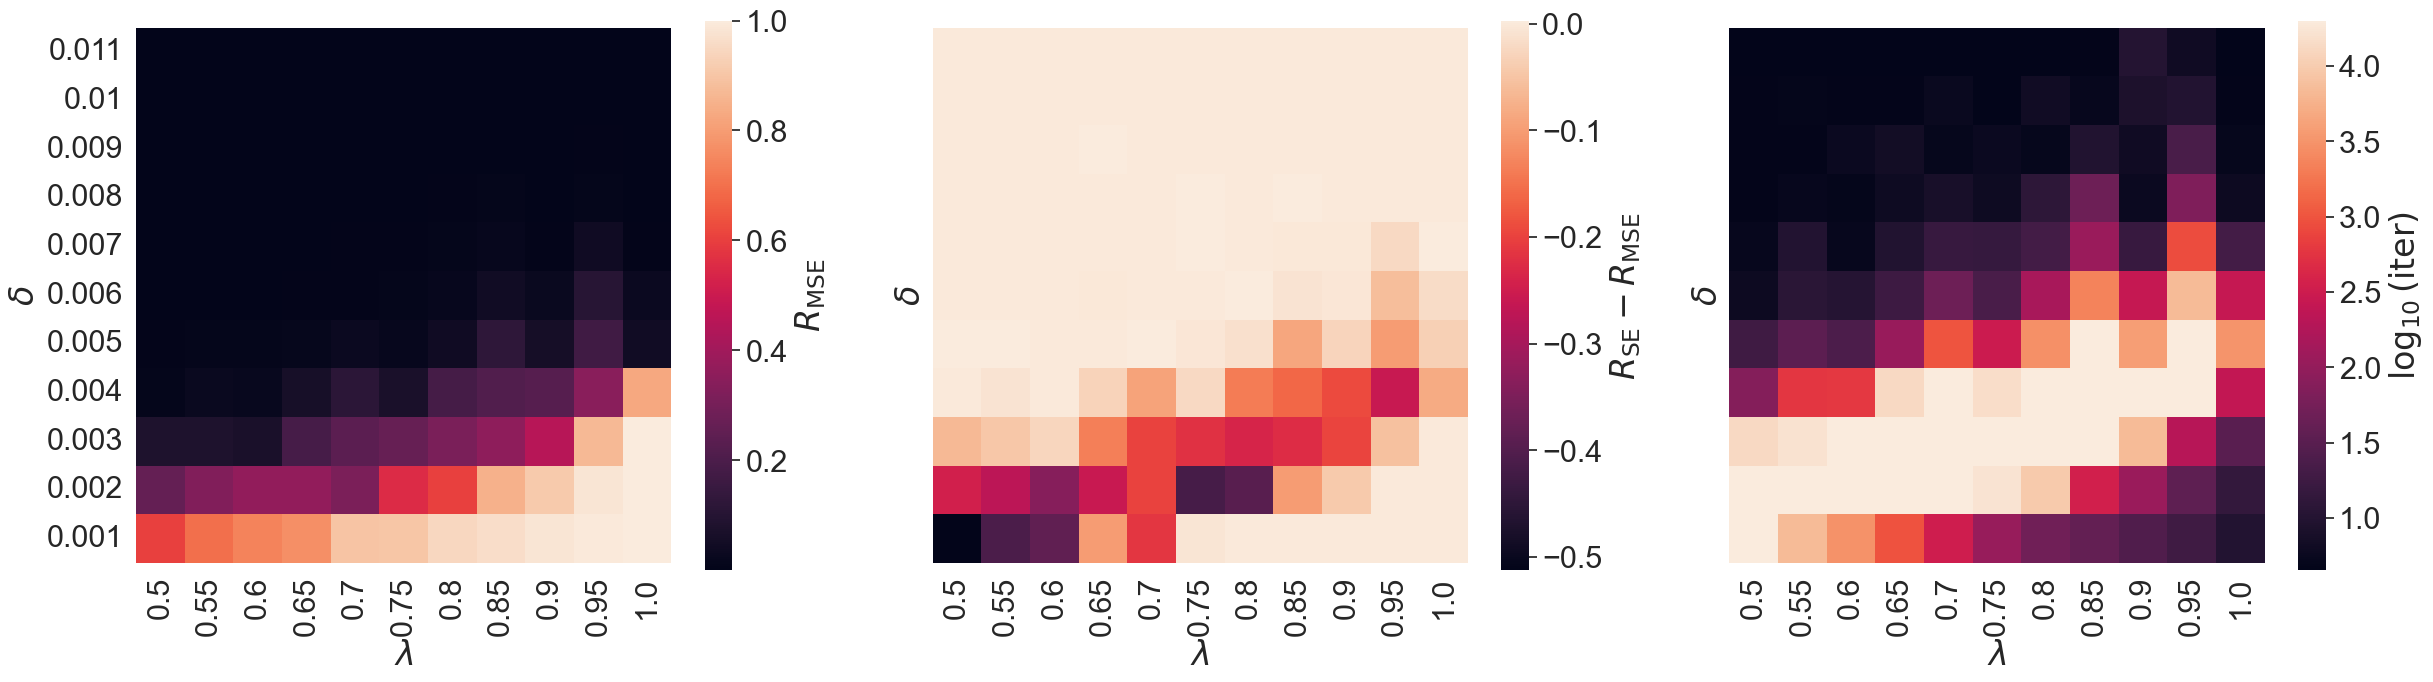

In [11]:
sns.set_theme(font_scale=2)
pal = sns.color_palette("rocket", as_cmap=True)
pal_r = sns.color_palette("rocket_r", as_cmap=True)
fig,ax = plt.subplots(1,3,figsize=(25,7), sharey=True)
#plt.suptitle(f"Snap time = " + r"$9/\lambda$, " + N_s + f" = {N}, {d}-{graph}, init={init_s}")

sns.heatmap(rmsedf[0].pivot(del_s,l_s,r"$R_{MSE}$"), cbar_kws={'label': r"$R_{\rm MSE}$"}, ax=ax[0],cmap=pal)
sns.heatmap(drsedf[0].pivot(del_s,l_s,r"$\delta R_{SE}$"), cbar_kws={'label': r"$R_{\rm SE} - R_{\rm MSE}$"}, ax=ax[1], cmap=pal)
sns.heatmap(itdf[0].pivot(del_s,l_s,log_it), cbar_kws={'label': log_it}, ax=ax[2], cmap=pal)#, vmin=0, vmax=np.log10(20000))

for a in ax:
    a.invert_yaxis()
    a.set( aspect='equal')

plt.tight_layout()
fig.savefig(save_dir + f"Figure7.pdf")